# Data Science approach for analysis of the probability of loan delinquency

### A Capstone project whose objective is to  building and validating a predictive model to assess the likelihood of a loan becoming delinquent (more than 90 days late) over a 12-month period.  

### Analyzed the features provided in the data, identify any missing values, and perform necessary preprocessing. Experimented with different models (e.g., logistic regression, decision trees, random forest) using train/test split  to find the most suitable one. Performanced metrics such as AUC-ROC, precision, recall, and F1-score used to evaluate the model's effectiveness..

### The results were highly successfull that the model can be used for analysis of the probability of loan delinquency

### 1. Analyzing the features provided in the datas, identify any missing values, and perform necessary preprocessing:

#### First, we will import necessary libraries and csv file.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train_data.csv')
valid = pd.read_csv('valid_data.csv')

#### Checking the contents of databases

In [4]:
train

,Unnamed: 0,days_90_queries,flag_zpexp,ageolddate_f7,f41_my,age2,f39_my,active_crd_amount_to_limit,sumlastvalue_7_f50,avg_active_credit_limit,...,agelifelastterm_f29,cntstartcntr_3_f75,closedel_12_f95,max_active_crd_res_amount_to_limit,active_number_of_outstanding_instalments,value_cr_card_contract,final_resincome,f8,inst_credit_cnt,target
0,0,4.0,0,26.0,NaN,25.0,12.0,NaN,6017.76,NaN,...,15.0,0.0,0.0,NaN,NaN,0.0,12.111597,0.000,NaN,0
1,1,2.0,0,101.0,NaN,31.0,NaN,0.654416,NaN,360000.0,...,26.0,0.0,0.0,0.942823,257.0,0.0,13.230096,68881.260,36.0,0
2,2,11.0,0,46.0,NaN,22.0,NaN,0.608811,NaN,73384.0,...,2.0,3.0,0.0,0.789278,17.0,0.0,11.422727,7353.900,NaN,0
3,3,4.0,0,126.0,NaN,45.0,NaN,0.761899,NaN,1081991.0,...,60.0,1.0,0.0,0.992436,64.0,0.0,13.558042,96547.400,9.0,0
4,4,4.0,0,126.0,NaN,45.0,NaN,0.761899,NaN,1081991.0,...,60.0,1.0,0.0,0.992436,64.0,0.0,13.558042,96547.400,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55707,55707,7.0,0,41.0,22.0,25.0,37.0,NaN,11162.00,NaN,...,19.0,0.0,0.0,NaN,NaN,0.0,11.920868,NaN,NaN,0
55708,55708,12.0,0,55.0,9.0,28.0,44.0,NaN,41118.00,NaN,...,17.0,0.0,0.0,NaN,NaN,4882.0,11.276203,NaN,0.0,1
55709,55709,9.0,0,95.0,33.0,32.0,NaN,NaN,NaN,NaN,...,62.0,0.0,0.0,NaN,15.0,15896.0,12.390766,12478.000,8.0,1
55710,55710,17.0,0,114.0,6.0,39.0,NaN,NaN,NaN,200000.0,...,0.0,1.0,0.0,0.000000,23.0,60390.0,12.740195,922.315,NaN,0


In [83]:
valid

,Unnamed: 0,days_90_queries,flag_zpexp,ageolddate_f7,f41_my,age2,f39_my,active_crd_amount_to_limit,sumlastvalue_7_f50,avg_active_credit_limit,...,agelifelastterm_f29,cntstartcntr_3_f75,closedel_12_f95,max_active_crd_res_amount_to_limit,active_number_of_outstanding_instalments,value_cr_card_contract,final_resincome,f8,inst_credit_cnt,target
0,0,2.0,0,65.0,NaN,31.0,NaN,NaN,NaN,NaN,...,4.0,1.0,0.0,NaN,300.0,0.0,13.042679,68733.475000,10.0,0
1,1,0.0,0,54.0,NaN,26.0,NaN,0.541082,NaN,767458.000000,...,21.0,0.0,0.0,0.541082,2.0,0.0,NaN,21704.000000,9.0,0
2,2,14.0,0,85.0,NaN,53.0,2.0,0.626846,18596.55,980126.500000,...,11.0,2.0,2.0,0.997200,140.0,0.0,NaN,18699.547647,27.0,1
3,3,4.0,0,7.0,NaN,42.0,NaN,NaN,64984.52,NaN,...,NaN,0.0,1.0,NaN,6.0,NaN,14.086852,66497.420000,NaN,0
4,4,2.0,0,136.0,NaN,35.0,NaN,0.392477,NaN,539909.000000,...,35.0,0.0,0.0,0.392477,56.0,0.0,13.065869,63887.623333,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13515,13515,12.0,1,15.0,NaN,20.0,NaN,0.666010,18082.34,79995.000000,...,2.0,3.0,1.0,0.848000,40.0,0.0,NaN,43355.064286,3.0,0
13516,13516,7.0,0,66.0,NaN,53.0,NaN,NaN,3003.80,500000.000000,...,32.0,1.0,4.0,0.000000,72.0,0.0,14.220249,97325.000000,33.0,0
13517,13517,33.0,0,133.0,32.0,44.0,NaN,0.950513,72286.72,764291.428571,...,0.0,6.0,4.0,1.000000,70.0,6.0,NaN,37125.244545,NaN,0
13518,13518,11.0,0,34.0,NaN,24.0,NaN,0.789136,191250.00,333333.333333,...,4.0,7.0,7.0,0.985320,62.0,0.0,NaN,64331.208333,8.0,0


#### Deleting unnecessary column:

In [5]:
train=train.drop(columns='Unnamed: 0')
valid=valid.drop(columns='Unnamed: 0')

#### Removing empty rows (if the number is up to 5% of all lines, this will not affect the results)

In [6]:
train=train.dropna(subset=['days_90_queries','ageolddate_f7','ageoldexsdate_f5','max_overdue_cr_card','overdue_credit_contract'])
train.isna().sum()

days_90_queries                                 0
flag_zpexp                                      0
ageolddate_f7                                   0
f41_my                                      29556
age2                                            0
f39_my                                      33546
active_crd_amount_to_limit                  17006
sumlastvalue_7_f50                          19962
avg_active_credit_limit                     15287
total_amount                                 1696
amount_of_last_term_contr                    6370
avgcontractlife                              5132
sm_plus_3_months_rt                         12572
ageoldexsdate_f5                                0
total_crd_cnt                                   0
gender                                          0
inst_crd_cnt                                 9496
avg_active_amount                            9428
max_overdue_cr_card                             0
overdue_credit_contract                         0


In [7]:
valid=valid.dropna(subset=['days_90_queries','ageolddate_f7','ageoldexsdate_f5','max_overdue_cr_card','overdue_credit_contract'])
valid.isna().sum()

days_90_queries                                0
flag_zpexp                                     0
ageolddate_f7                                  0
f41_my                                      7283
age2                                           0
f39_my                                      8686
active_crd_amount_to_limit                  3677
sumlastvalue_7_f50                          4588
avg_active_credit_limit                     3287
total_amount                                  49
amount_of_last_term_contr                   1257
avgcontractlife                              903
sm_plus_3_months_rt                         1662
ageoldexsdate_f5                               0
total_crd_cnt                                  0
gender                                         0
inst_crd_cnt                                2160
avg_active_amount                            988
max_overdue_cr_card                            0
overdue_credit_contract                        0
total_credit_limit  

#### Filling the remaining missing lines with zeros (in all cases, if not filled, then most likely there were no delays, for example)

In [8]:
train=train.fillna(0)
train.isna().sum()

days_90_queries                             0
flag_zpexp                                  0
ageolddate_f7                               0
f41_my                                      0
age2                                        0
f39_my                                      0
active_crd_amount_to_limit                  0
sumlastvalue_7_f50                          0
avg_active_credit_limit                     0
total_amount                                0
amount_of_last_term_contr                   0
avgcontractlife                             0
sm_plus_3_months_rt                         0
ageoldexsdate_f5                            0
total_crd_cnt                               0
gender                                      0
inst_crd_cnt                                0
avg_active_amount                           0
max_overdue_cr_card                         0
overdue_credit_contract                     0
total_credit_limit                          0
max_del_history                   

In [9]:
valid=valid.fillna(0)
valid.isna().sum()

days_90_queries                             0
flag_zpexp                                  0
ageolddate_f7                               0
f41_my                                      0
age2                                        0
f39_my                                      0
active_crd_amount_to_limit                  0
sumlastvalue_7_f50                          0
avg_active_credit_limit                     0
total_amount                                0
amount_of_last_term_contr                   0
avgcontractlife                             0
sm_plus_3_months_rt                         0
ageoldexsdate_f5                            0
total_crd_cnt                               0
gender                                      0
inst_crd_cnt                                0
avg_active_amount                           0
max_overdue_cr_card                         0
overdue_credit_contract                     0
total_credit_limit                          0
max_del_history                   

#### Changing to 0 and 1, for division there was a delay in payment of more than 90 days and there was no

In [10]:
train['f41_my']=np.where(train['f41_my']>0,1,train['f41_my'])
train['f41_my']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
55705    1.0
55706    1.0
55709    1.0
55710    1.0
55711    1.0
Name: f41_my, Length: 52282, dtype: float64

In [11]:
valid['f41_my']=np.where(valid['f41_my']>0,1,valid['f41_my'])
valid['f41_my']

0        0.0
1        0.0
2        0.0
4        0.0
5        0.0
        ... 
13515    0.0
13516    0.0
13517    1.0
13518    0.0
13519    1.0
Name: f41_my, Length: 12732, dtype: float64

#### Embedded methods. Creating variables to analize with different methods

In [12]:
x=train.drop(columns='f41_my')

In [13]:
y=train['f41_my']

In [14]:
from numpy import loadtxt
from xgboost import XGBRegressor
from matplotlib import pyplot

# fit model no training data
model = XGBRegressor()
model.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### Checking feature importance. It shows that data 'Number of months from the beginning of the last delinquency 7-30' influences the most

In [15]:
# feature importance
print(model.feature_importances_)

[0.00121229 0.0013778  0.00356423 0.00195348 0.00515458 0.00200529
 0.00277903 0.00248736 0.00694665 0.00282174 0.00345859 0.00228722
 0.00359536 0.00637343 0.00194961 0.00318958 0.00246569 0.0033623
 0.01549939 0.00298716 0.00246634 0.0020754  0.00307415 0.00210874
 0.8512846  0.00261223 0.00139813 0.00266306 0.00252228 0.00228836
 0.00239927 0.04146677 0.00126305 0.00241792 0.00311653 0.0013724 ]


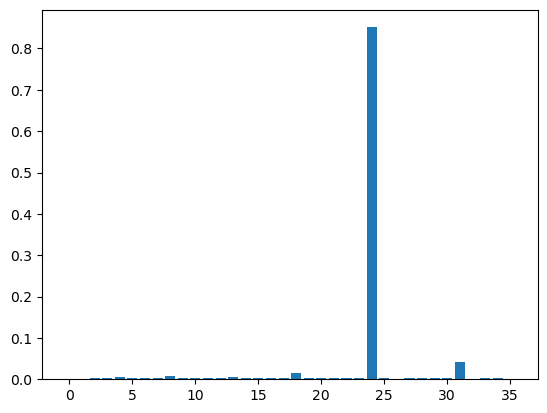

In [16]:
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [17]:
x.columns

Index(['days_90_queries', 'flag_zpexp', 'ageolddate_f7', 'age2', 'f39_my',
       'active_crd_amount_to_limit', 'sumlastvalue_7_f50',
       'avg_active_credit_limit', 'total_amount', 'amount_of_last_term_contr',
       'avgcontractlife', 'sm_plus_3_months_rt', 'ageoldexsdate_f5',
       'total_crd_cnt', 'gender', 'inst_crd_cnt', 'avg_active_amount',
       'max_overdue_cr_card', 'overdue_credit_contract', 'total_credit_limit',
       'max_del_history', 'cnt_overdue_0_f151', 'credit_closed_cnt', 'f38_my',
       'f156', 'closedel_6', 'agelifelastterm_f29', 'cntstartcntr_3_f75',
       'closedel_12_f95', 'max_active_crd_res_amount_to_limit',
       'active_number_of_outstanding_instalments', 'value_cr_card_contract',
       'final_resincome', 'f8', 'inst_credit_cnt', 'target'],
      dtype='object')

In [18]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
55705    1.0
55706    1.0
55709    1.0
55710    1.0
55711    1.0
Name: f41_my, Length: 52282, dtype: float64

#### Normalizing data 'age of the klient' to achive a standardized format

(array([2.720e+02, 3.890e+02, 2.038e+03, 1.712e+03, 3.844e+03, 2.198e+03,
        2.354e+03, 5.074e+03, 2.722e+03, 4.938e+03, 2.264e+03, 4.450e+03,
        1.893e+03, 1.751e+03, 2.977e+03, 1.437e+03, 2.298e+03, 9.680e+02,
        8.420e+02, 1.573e+03, 6.380e+02, 1.164e+03, 5.320e+02, 9.290e+02,
        3.820e+02, 3.380e+02, 6.010e+02, 2.910e+02, 5.050e+02, 2.400e+02,
        2.370e+02, 8.100e+01, 8.400e+01, 1.140e+02, 4.600e+01, 8.300e+01,
        1.800e+01, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([18.  , 19.42, 20.84, 22.26, 23.68, 25.1 , 26.52, 27.94, 29.36,
        30.78, 32.2 , 33.62, 35.04, 36.46, 37.88, 39.3 , 40.72, 42.14,
        43.56, 44.98, 46.4 , 47.82, 49.24, 50.66, 52.08, 53.5 , 54.92,
        56.34, 57.76, 59.18, 60.6 , 62.02, 63.44, 64.86, 66.28, 67.7 ,
        69.12, 70.54, 71.96, 73.38, 74.8 , 76.22, 77.64, 79.06, 80.48,
        81.9 , 83.32,

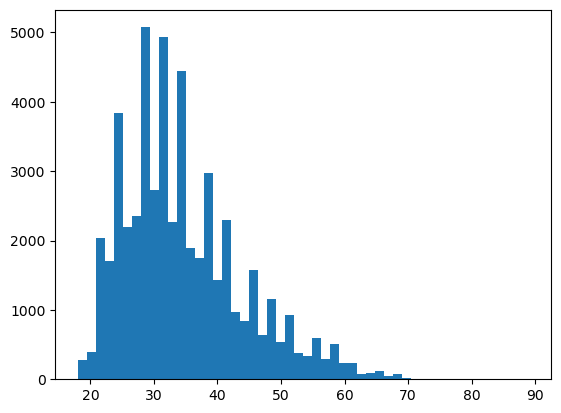

In [20]:
#пробую нормализовать данные столбца "возраст"
plt.hist(train['age2'],bins=50)

In [21]:
train['age2'] = np.log(train['age2'])

(array([1.500e+01, 2.570e+02, 0.000e+00, 3.890e+02, 8.880e+02, 0.000e+00,
        1.150e+03, 1.712e+03, 1.740e+03, 0.000e+00, 2.104e+03, 2.198e+03,
        2.354e+03, 2.403e+03, 2.671e+03, 2.722e+03, 0.000e+00, 4.938e+03,
        2.264e+03, 2.186e+03, 2.264e+03, 1.893e+03, 1.751e+03, 1.574e+03,
        2.840e+03, 1.231e+03, 1.067e+03, 1.810e+03, 8.470e+02, 7.260e+02,
        1.229e+03, 1.105e+03, 4.970e+02, 8.140e+02, 6.570e+02, 2.820e+02,
        5.440e+02, 4.920e+02, 2.370e+02, 1.650e+02, 1.140e+02, 8.900e+01,
        6.100e+01, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([2.89037176, 2.92233705, 2.95430234, 2.98626763, 3.01823293,
        3.05019822, 3.08216351, 3.1141288 , 3.1460941 , 3.17805939,
        3.21002468, 3.24198997, 3.27395526, 3.30592056, 3.33788585,
        3.36985114, 3.40181643, 3.43378173, 3.46574702, 3.49771231,
        3.5296776 , 3.56164289, 3.59360819, 3.62557348, 3.65753877,
        3.68950406, 3.72146936, 3.75

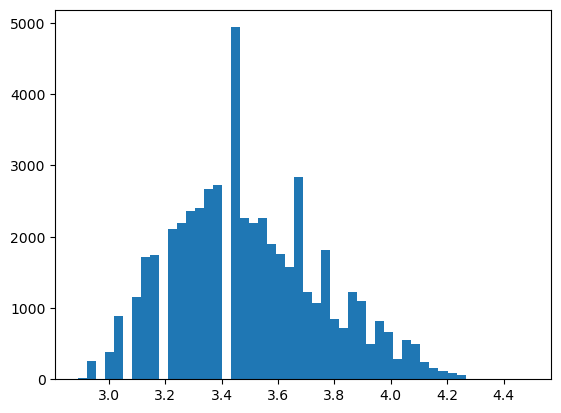

In [22]:
plt.hist(train['age2'],bins = 50)

## 2.Training and testing.
We take 67% of dataset as train dataset and the rest will be our test dataset, and randomize the splitting of data by using train_test_split.

The following algorithms are used to train and tes KNN
- Decision Tree Regre
- Decision Tree Classifierssion
- Random Forest
- Gradien Boosting

In [ ]:
#DecisionTreeRegressor

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [24]:
tree = DecisionTreeRegressor(max_depth=6)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [26]:
tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [27]:
y_pred = tree.predict(x_test)

In [28]:
def model_evaluation(model, x_test, y_test, model_name):
    y_pred = model.predict(x_test)
    
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

model_evaluation(tree, x_test, y_test, 'Decision Tree Regressor')

,Decision Tree Regressor
MAE,0.036346
MSE,0.019622
RMSE,0.140079
R2-Score,0.920122


In [29]:
def model_evaluation(model, x_test, y_test, model_name):
    y_pred = model.predict(x_test)
    
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

model_evaluation(tree, x_train, y_train, 'Decision Tree Regressor')

,Decision Tree Regressor
MAE,0.033610
MSE,0.016805
RMSE,0.129633
R2-Score,0.931530


In [30]:
x1=valid.drop(columns='f41_my')

In [31]:
y1=valid['f41_my']

In [32]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3, random_state=0)

In [33]:
tree.fit(x_train1, y_train1)

DecisionTreeRegressor(max_depth=6)

In [34]:
y_pred1 = tree.predict(x_test1)

In [35]:
def model_evaluation(model, x_test1, y_test1, model_name):
    y_pred1 = model.predict(x_test1)
    
    MAE = metrics.mean_absolute_error(y_test1, y_pred1)
    MSE = metrics.mean_squared_error(y_test1, y_pred1)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test1, y_pred1)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

model_evaluation(tree, x_test1, y_test1, 'Decision Tree Regressor')

,Decision Tree Regressor
MAE,0.031893
MSE,0.020513
RMSE,0.143222
R2-Score,0.916484


In [36]:
def model_evaluation(model, x_test1, y_test1, model_name):
    y_pred1 = model.predict(x_test1)
    
    MAE = metrics.mean_absolute_error(y_test1, y_pred1)
    MSE = metrics.mean_squared_error(y_test1, y_pred1)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test1, y_pred1)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

model_evaluation(tree, x_train1, y_train1, 'Decision Tree Regressor')

,Decision Tree Regressor
MAE,0.021854
MSE,0.010927
RMSE,0.104531
R2-Score,0.955241


In [ ]:
#DecisionTreeClassifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [38]:
tree = DecisionTreeClassifier(max_depth=7)

In [42]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [43]:
y_pred = tree.predict(x_test)

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      8836
         1.0       0.98      0.96      0.97      6849

    accuracy                           0.97     15685
   macro avg       0.98      0.97      0.97     15685
weighted avg       0.97      0.97      0.97     15685



In [46]:
df_new=pd.DataFrame()

In [47]:
df_new['y_test']=y_test

In [48]:
df_new['y_pred']=y_pred

In [49]:
df_new

,y_test,y_pred
26963,0.0,0.0
21097,1.0,1.0
28096,1.0,1.0
36761,0.0,0.0
39022,1.0,1.0
...,...,...
36098,0.0,0.0
27128,0.0,0.0
18063,0.0,0.0
6729,0.0,0.0


In [50]:
df_new[df_new['y_test'] != df_new['y_pred']]

,y_test,y_pred
44620,1.0,0.0
53260,1.0,0.0
39561,0.0,1.0
23367,0.0,1.0
5196,1.0,0.0
...,...,...
22554,1.0,0.0
17896,0.0,1.0
7038,0.0,1.0
44834,1.0,0.0


In [52]:
tree.fit(x_train1, y_train1)

DecisionTreeClassifier(max_depth=7)

In [53]:
y_pred1 = tree.predict(x_test1)

In [55]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2163
         1.0       0.98      0.97      0.97      1657

    accuracy                           0.98      3820
   macro avg       0.98      0.98      0.98      3820
weighted avg       0.98      0.98      0.98      3820



In [56]:
df_new1=pd.DataFrame()

In [59]:
df_new1['y_test1']=y_test1

In [60]:
df_new1['y_pred1']=y_pred1

In [61]:
df_new1

,y_test1,y_pred1
565,0.0,0.0
12171,1.0,1.0
8540,0.0,0.0
1638,1.0,1.0
13146,0.0,0.0
...,...,...
4674,1.0,1.0
1209,1.0,1.0
7687,0.0,0.0
11494,1.0,1.0


In [62]:
df_new1[df_new1['y_test1'] != df_new1['y_pred1']]

,y_test1,y_pred1
4272,0.0,1.0
10014,1.0,0.0
7672,0.0,1.0
7184,1.0,0.0
12758,0.0,1.0
...,...,...
5215,1.0,0.0
10035,0.0,1.0
10195,0.0,1.0
12773,1.0,0.0


In [ ]:
#RandomForestRegressor
#GradientBoostingRegressor

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

In [64]:
model1 = RandomForestRegressor()
model2 = GradientBoostingRegressor()

In [65]:
x_train

,days_90_queries,flag_zpexp,ageolddate_f7,age2,f39_my,active_crd_amount_to_limit,sumlastvalue_7_f50,avg_active_credit_limit,total_amount,amount_of_last_term_contr,...,agelifelastterm_f29,cntstartcntr_3_f75,closedel_12_f95,max_active_crd_res_amount_to_limit,active_number_of_outstanding_instalments,value_cr_card_contract,final_resincome,f8,inst_credit_cnt,target
52326,22.0,0,27.0,26.0,0.0,0.503475,14626.00,1.704586e+05,231749.5,30000.00,...,1.0,11.0,2.0,1.000000,1.0,4.0,0.000000,7391.538571,7.0,0
22997,7.0,0,75.0,56.0,0.0,0.903858,146864.04,2.000000e+06,54614975.0,10956467.65,...,8.0,2.0,2.0,0.903858,290.0,0.0,0.000000,101815.866667,56.0,0
28740,2.0,0,40.0,28.0,0.0,0.979245,0.00,1.878247e+06,5616311.0,0.00,...,26.0,0.0,0.0,0.979245,159.0,0.0,13.128524,47936.162500,9.0,0
48817,5.0,0,189.0,43.0,16.0,0.725114,57282.22,3.562630e+05,32555640.0,15000000.00,...,8.0,0.0,1.0,0.725114,0.0,144.0,0.000000,31753.000000,3.0,0
4645,4.0,0,72.0,38.0,0.0,0.000000,7158.67,0.000000e+00,7432209.0,110000.00,...,1.0,4.0,0.0,0.000000,2.0,0.0,13.815511,174891.635000,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38238,10.0,0,92.0,40.0,0.0,0.841489,20750.97,3.355335e+05,6022166.0,770688.00,...,49.0,2.0,0.0,0.907003,148.0,0.0,0.000000,40111.813333,18.0,0
12620,0.0,0,50.0,25.0,0.0,0.829879,0.00,2.231400e+06,10000.0,10000.00,...,0.0,0.0,0.0,0.988060,0.0,1.0,0.000000,111299.000000,0.0,0
42541,5.0,1,85.0,53.0,0.0,0.903385,0.00,1.028296e+06,12450815.0,0.00,...,45.0,0.0,0.0,0.969196,172.0,0.0,0.000000,45349.211667,27.0,0
13462,26.0,0,47.0,24.0,24.0,0.863372,35350.77,2.428422e+06,14636066.7,259680.00,...,8.0,4.0,1.0,0.954240,119.0,30.0,14.004761,74403.878750,63.0,1


In [66]:
x_test

,days_90_queries,flag_zpexp,ageolddate_f7,age2,f39_my,active_crd_amount_to_limit,sumlastvalue_7_f50,avg_active_credit_limit,total_amount,amount_of_last_term_contr,...,agelifelastterm_f29,cntstartcntr_3_f75,closedel_12_f95,max_active_crd_res_amount_to_limit,active_number_of_outstanding_instalments,value_cr_card_contract,final_resincome,f8,inst_credit_cnt,target
26963,1.0,1,65.0,52.0,0.0,0.432757,0.00,3.902500e+05,855031.00,0.0,...,15.0,0.0,0.0,0.542284,49.0,0.0,13.385038,15446.776000,9.0,0
21097,22.0,0,114.0,32.0,0.0,0.000000,18064.50,0.000000e+00,2877980.00,100000.0,...,1.0,9.0,0.0,0.000000,23.0,41480.0,0.000000,59326.198333,29.0,1
28096,19.0,0,50.0,26.0,0.0,0.000000,59250.00,0.000000e+00,2367355.50,700000.0,...,1.0,4.0,5.0,0.000000,33.0,13599.0,12.321760,10130.120000,22.0,0
36761,6.0,0,100.0,33.0,0.0,0.677020,0.00,5.556667e+05,749877.00,71000.0,...,1.0,2.0,1.0,1.001164,21.0,0.0,0.000000,20598.695000,0.0,1
39022,7.0,0,100.0,40.0,0.0,0.463116,0.00,6.713973e+05,1962890.00,800000.0,...,61.0,1.0,0.0,0.605873,3.0,11500.0,0.000000,47712.500000,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36098,27.0,0,61.0,30.0,0.0,0.921729,21440.65,5.002030e+05,3102804.00,220000.0,...,35.0,1.0,2.0,0.999673,39.0,45.0,13.671992,49735.192500,13.0,0
27128,0.0,0,35.0,27.0,0.0,0.225247,27782.64,7.500000e+04,641169.00,160000.0,...,20.0,0.0,2.0,0.225247,0.0,0.0,12.106887,0.000000,13.0,0
18063,11.0,0,80.0,34.0,0.0,0.705289,125525.54,3.533333e+05,12201227.32,4806000.0,...,18.0,6.0,0.0,0.812785,131.0,1.0,0.000000,31590.613333,49.0,0
6729,1.0,0,24.0,24.0,0.0,0.878191,0.00,7.436090e+05,2714864.00,0.0,...,0.0,1.0,0.0,0.908742,23.0,0.0,0.000000,85131.666667,0.0,0


In [67]:
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

GradientBoostingRegressor()

In [68]:
y_pred1 = model1.predict(x_test)

In [69]:
y_pred1

array([0., 1., 1., ..., 0., 0., 0.])

In [70]:
y_pred2 = model2.predict(x_test)

In [71]:
y_pred2

array([-7.73565487e-03,  9.91595827e-01,  9.89602837e-01, ...,
       -1.61927750e-02,  2.08071715e-03,  8.57036684e-04])

In [ ]:
y_test

In [72]:
def model_evaluation(model, x_test, y_test, model_name):
    y_pred = model.predict(x_test)
    
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

model_evaluation(model1, x_test, y_test, 'Random Forest Regressor')

,Random Forest Regressor
MAE,0.027723
MSE,0.013305
RMSE,0.115349
R2-Score,0.945910


In [73]:
def model_evaluation(model, x_test, y_test, model_name):
    y_pred = model.predict(x_test)
    
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

model_evaluation(model2, x_test, y_test, 'Gradient Boosting Regressor')

,Gradient Boosting Regressor
MAE,0.045909
MSE,0.020192
RMSE,0.142098
R2-Score,0.917916


In [74]:
def model_evaluation(model, x_test, y_test, model_name):
    y_pred = model.predict(x_test)
    
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

model_evaluation(model1, x_train, y_train, 'Random Forest Regressor')

,Random Forest Regressor
MAE,0.009573
MSE,0.001640
RMSE,0.040493
R2-Score,0.993315


In [75]:
def model_evaluation(model, x_test, y_test, model_name):
    y_pred = model.predict(x_test)
    
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

model_evaluation(model2, x_train, y_train, 'Gradient Boosting Regressor')

,Gradient Boosting Regressor
MAE,0.042890
MSE,0.017394
RMSE,0.131887
R2-Score,0.929084


In [ ]:
#valid

In [76]:
model1.fit(x_train1, y_train1)
model2.fit(x_train1, y_train1)

GradientBoostingRegressor()

In [77]:
y_pred3 = model1.predict(x_test1)

In [78]:
y_pred3

array([0.01, 1.  , 0.  , ..., 0.  , 1.  , 1.  ])

In [79]:
y_pred4 = model2.predict(x_test1)

In [80]:
y_pred4

array([ 6.86794643e-02,  9.92253181e-01, -3.15315295e-04, ...,
       -1.08281675e-03,  9.85329048e-01,  1.01750071e+00])

In [81]:
y_test1

565      0.0
12171    1.0
8540     0.0
1638     1.0
13146    0.0
        ... 
4674     1.0
1209     1.0
7687     0.0
11494    1.0
7457     1.0
Name: f41_my, Length: 3820, dtype: float64

In [82]:
def model_evaluation(model, x_test1, y_test1, model_name):
    y_pred1 = model.predict(x_test1)
    
    MAE = metrics.mean_absolute_error(y_test1, y_pred1)
    MSE = metrics.mean_squared_error(y_test1, y_pred1)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test1, y_pred1)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

model_evaluation(model1, x_test1, y_test1, 'Random Forest Regressor')

,Random Forest Regressor
MAE,0.029327
MSE,0.014366
RMSE,0.119860
R2-Score,0.941508


In [83]:
def model_evaluation(model, x_test1, y_test1, model_name):
    y_pred1 = model.predict(x_test1)
    
    MAE = metrics.mean_absolute_error(y_test1, y_pred1)
    MSE = metrics.mean_squared_error(y_test1, y_pred1)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test1, y_pred1)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

model_evaluation(model2, x_test1, y_test1, 'Gradient Boosting Regressor')

,Gradient Boosting Regressor
MAE,0.043425
MSE,0.017791
RMSE,0.133381
R2-Score,0.927567


In [84]:
def model_evaluation(model, x_test1, y_test1, model_name):
    y_pred1 = model.predict(x_test1)
    
    MAE = metrics.mean_absolute_error(y_test1, y_pred1)
    MSE = metrics.mean_squared_error(y_test1, y_pred1)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test1, y_pred1)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

model_evaluation(model1, x_train1, y_train1, 'Random Forest Regressor')

,Random Forest Regressor
MAE,0.009387
MSE,0.001695
RMSE,0.041174
R2-Score,0.993056


In [85]:
def model_evaluation(model, x_test1, y_test1, model_name):
    y_pred1 = model.predict(x_test1)
    
    MAE = metrics.mean_absolute_error(y_test1, y_pred1)
    MSE = metrics.mean_squared_error(y_test1, y_pred1)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test1, y_pred1)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

model_evaluation(model2, x_train1, y_train1, 'Gradient Boosting Regressor')

,Gradient Boosting Regressor
MAE,0.034604
MSE,0.011573
RMSE,0.107578
R2-Score,0.952594


In [ ]:
#GradientBoostingClassifier, RandomForestClassifier

In [86]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split

In [87]:
y.value_counts()

f41_my
0.0    29649
1.0    22633
Name: count, dtype: int64

In [88]:
model1 = RandomForestClassifier()
model2 = GradientBoostingClassifier()

In [89]:
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

GradientBoostingClassifier()

In [90]:
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)

In [ ]:
## random forest result

In [91]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      8836
         1.0       0.99      0.98      0.98      6849

    accuracy                           0.99     15685
   macro avg       0.99      0.98      0.99     15685
weighted avg       0.99      0.99      0.99     15685



In [92]:
## gradient boosting result

In [93]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      8836
         1.0       0.98      0.97      0.97      6849

    accuracy                           0.98     15685
   macro avg       0.98      0.98      0.98     15685
weighted avg       0.98      0.98      0.98     15685



#### Checking how many data does not match 

In [94]:
df_new = pd.DataFrame()

In [95]:
df_new['y_test'] = y_test

In [96]:
df_new['y_pred'] = y_pred1

In [97]:
df_new

,y_test,y_pred
26963,0.0,0.0
21097,1.0,1.0
28096,1.0,1.0
36761,0.0,0.0
39022,1.0,1.0
...,...,...
36098,0.0,0.0
27128,0.0,0.0
18063,0.0,0.0
6729,0.0,0.0


In [98]:
df_new[df_new['y_test'] != df_new['y_pred']]

,y_test,y_pred
39561,0.0,1.0
23367,0.0,1.0
20112,0.0,1.0
279,0.0,1.0
36670,1.0,0.0
...,...,...
13011,1.0,0.0
17896,0.0,1.0
44834,1.0,0.0
16779,1.0,0.0


In [99]:
df_new['y_pred'] = y_pred2

In [100]:
df_new

,y_test,y_pred
26963,0.0,0.0
21097,1.0,1.0
28096,1.0,1.0
36761,0.0,0.0
39022,1.0,1.0
...,...,...
36098,0.0,0.0
27128,0.0,0.0
18063,0.0,0.0
6729,0.0,0.0


In [101]:
df_new[df_new['y_test'] != df_new['y_pred']]

,y_test,y_pred
53260,1.0,0.0
39561,0.0,1.0
23367,0.0,1.0
5196,1.0,0.0
20112,0.0,1.0
...,...,...
17896,0.0,1.0
6958,0.0,1.0
37752,1.0,0.0
44834,1.0,0.0


In [102]:
x1=valid.drop(columns='f41_my')

In [103]:
y1=valid['f41_my']

In [104]:
model1.fit(x_train1, y_train1)
model2.fit(x_train1, y_train1)

GradientBoostingClassifier()

In [105]:
y_pred3 = model1.predict(x_test1)
y_pred4 = model2.predict(x_test1)

In [106]:
print(classification_report(y_test1, y_pred3))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2163
         1.0       0.98      0.98      0.98      1657

    accuracy                           0.98      3820
   macro avg       0.98      0.98      0.98      3820
weighted avg       0.98      0.98      0.98      3820



In [107]:
print(classification_report(y_test1, y_pred4))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2163
         1.0       0.98      0.97      0.98      1657

    accuracy                           0.98      3820
   macro avg       0.98      0.98      0.98      3820
weighted avg       0.98      0.98      0.98      3820



### The highest models were Gradient Boosting, Random Forest and Decision Tree with score 98%, 99% and 98%, respectively.

Also showed how many data doesn`t match, it will help business understand how suitable the result